In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
output_df = pd.read_csv("../results/window_stats_20x_inds/Allenopithecus_nigroviridis_ssp_10kb_het_hom.txt",
                        sep="\t")
output_df

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
0,12.0,8,67,PD_0028,0,HiC_scaffold_15,10000,0.9828,aut,Allenopithecus_nigroviridis_ssp
1,56.0,6,130,PD_0028,10000,HiC_scaffold_15,20000,0.8920,aut,Allenopithecus_nigroviridis_ssp
2,144.0,1,207,PD_0028,20000,HiC_scaffold_15,30000,0.9418,aut,Allenopithecus_nigroviridis_ssp
3,48.0,3,100,PD_0028,30000,HiC_scaffold_15,40000,0.8840,aut,Allenopithecus_nigroviridis_ssp
4,54.0,7,125,PD_0028,40000,HiC_scaffold_15,50000,0.9799,aut,Allenopithecus_nigroviridis_ssp
...,...,...,...,...,...,...,...,...,...,...
761830,50.0,0,63,SAMN15801446,170710000,HiC_scaffold_25,170720000,0.9998,aut,Allenopithecus_nigroviridis_ssp
761831,26.0,0,81,SAMN15801446,170720000,HiC_scaffold_25,170730000,1.0000,aut,Allenopithecus_nigroviridis_ssp
761832,3.0,0,114,SAMN15801446,170730000,HiC_scaffold_25,170740000,0.9776,aut,Allenopithecus_nigroviridis_ssp
761833,1.0,0,48,SAMN15801446,170740000,HiC_scaffold_25,170750000,1.0000,aut,Allenopithecus_nigroviridis_ssp


<Axes: xlabel='alt_hom', ylabel='het'>

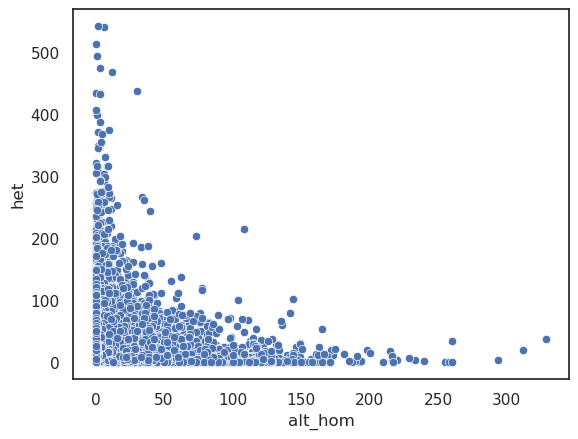

In [3]:
sns.scatterplot(output_df, y="het", x="alt_hom")

<Axes: xlabel='alt_hom', ylabel='het'>

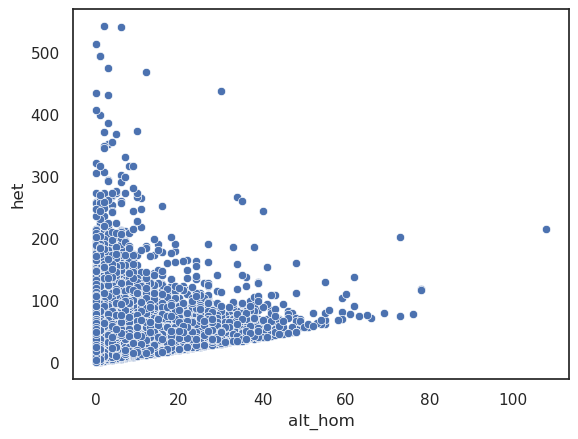

In [4]:
sns.scatterplot(output_df.loc[output_df.het > output_df.alt_hom], y="het", x="alt_hom")

<Axes: xlabel='window_start', ylabel='het'>

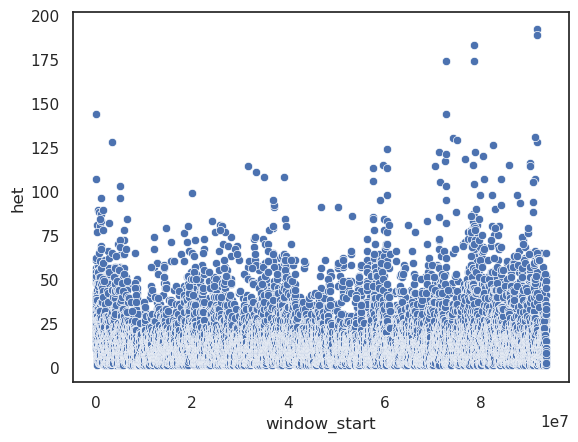

In [5]:
sns.scatterplot(output_df.loc[(output_df["chrom"] == "HiC_scaffold_15") & (output_df.het > output_df.alt_hom)],
                x="window_start", y="het")

In [6]:
output_df.loc[(output_df["chrom"] == "HiC_scaffold_15") & (output_df.het > output_df.alt_hom)].het.mean(),\
output_df.loc[(output_df["chrom"] == "HiC_scaffold_15") & (output_df.het < output_df.alt_hom)].het.mean(),\
output_df.loc[(output_df["chrom"] == "HiC_scaffold_15")].het.mean()

(15.859669166956435, 2.6883936080740116, 12.146376192510322)

In [7]:
len(output_df.loc[output_df.het > output_df.alt_hom])/(len(output_df))

0.7430795382202183

In [8]:
output_df = pd.read_csv("../results/window_stats_20x_inds/Aotus_griseimembra_ssp_10kb_het_hom.txt",
                        sep="\t")
output_df

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
0,0.0,0,0,PD_0802,0,NW_026988549.1,10000,0.0000,aut,Aotus_griseimembra_ssp
1,0.0,0,0,PD_0802,10000,NW_026988549.1,20000,0.0000,aut,Aotus_griseimembra_ssp
2,0.0,0,0,PD_0802,20000,NW_026988549.1,30000,0.0000,aut,Aotus_griseimembra_ssp
3,0.0,0,0,PD_0802,30000,NW_026988549.1,40000,0.0000,aut,Aotus_griseimembra_ssp
4,0.0,0,0,PD_0802,40000,NW_026988549.1,50000,0.0000,aut,Aotus_griseimembra_ssp
...,...,...,...,...,...,...,...,...,...,...
834715,NaN,69,69,PD_0804,4860000,NW_026988488.1,4870000,0.9877,chrX,Aotus_griseimembra_ssp
834716,NaN,45,45,PD_0804,4870000,NW_026988488.1,4880000,0.8647,chrX,Aotus_griseimembra_ssp
834717,NaN,35,35,PD_0804,4880000,NW_026988488.1,4890000,0.8052,chrX,Aotus_griseimembra_ssp
834718,0.0,0,0,PD_0804,4890000,NW_026988488.1,4900000,0.0000,chrX,Aotus_griseimembra_ssp


In [12]:
for df_path in glob.glob("../results/window_stats_20x_inds/*_10kb_het_hom.txt"):
    print(df_path)
    output_df = pd.read_csv(df_path, sep="\t")
    print(len(output_df), len(output_df)/len(output_df.GVCF_ID.unique()), output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Aotus_azarai_ssp_10kb_het_hom.txt
3696563 284351.0 ['PD_0798' 'PD_0799' 'PD_0800' 'PD_0801' 'PD_0806' 'PD_0807' 'PD_0808'
 'PD_0809' 'PD_0810' 'PD_0811' 'PD_0812' 'PD_0814' 'PD_0815']
../results/window_stats_20x_inds/Alouatta_caraya_ssp_10kb_het_hom.txt
260370 260370.0 ['PD_0073']
../results/window_stats_20x_inds/Aotus_griseimembra_ssp_10kb_het_hom.txt
834720 278240.0 ['PD_0802' 'PD_0803' 'PD_0804']
../results/window_stats_20x_inds/Alouatta_juara_ssp_10kb_het_hom.txt
520610 260305.0 ['PD_0420' 'PD_0421']
../results/window_stats_20x_inds/Aotus_nancymaae_ssp_10kb_het_hom.txt
3810690 293130.0 ['SAMN08978224' 'SAMN08978227' 'SAMN08978229' 'SAMN08978230'
 'SAMN08978231' 'SAMN08978234' 'SAMN08978235' 'SAMN08978239'
 'SAMN08978244' 'SAMN08978245' 'SAMN08978248' 'SAMN08978249'
 'SAMN08978250']
../results/window_stats_20x_inds/Aotus_trivirgatus_ssp_10kb_het_hom.txt
282355 282355.0 ['PD_0008']
../results/window_stats_20x_inds/Alouatta_belzebul_ssp_10kb_het_hom.tx

Aotus had an issue, so I have to determine what failed.

In [45]:

print("Loading metadata")
zarr_path = "../zarr_20x_inds/Aotus_azarai_ssp"
short_form = zarr_path.split("/")[-1].split("_")[0]
long_form = zarr_path.split("/")[-1]
# Loading the various metadata files. Metadata, contig information, callability bed.
metadata_path = metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"
metadata_df = pd.read_csv(metadata_path+"{}_individuals.txt".format(short_form), sep="\t")
metadata_df["SEX_I"] = [0 if x == "F" else 1 for x in metadata_df.GENETIC_SEX]
regions_df = pd.read_csv(metadata_path+"{}_regions_and_batches.txt".format(short_form), sep="\t")
regions_df["LENGTH"] = regions_df["END"]-regions_df["START"]
regions_df["chr_type"] = ["chrX" if x == 2 and y == 1 else "aut" for x, y in zip(regions_df.FEMALE_PLOIDY, regions_df.MALE_PLOIDY)]
large_contigs = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2)].CONTIG_ID.unique()
large_x = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2) &
                        (regions_df.MALE_PLOIDY == 1)].CONTIG_ID
print("Loading bed files")
bed_files = read_beds(long_form)
# Loading the genetic data.
print("Loading genetic data")
df_l = []

for c in glob.glob(zarr_path+"/*/")[:1]:   
    print(c)
    ds = sg.load_dataset(c[:-1])
    if len(ds.variants) < 10:
        print("Skipping due to too few variants")
    var_chunk = min(50, 1+len(ds.variants)//1000000)
    print(len(ds.variants), var_chunk)
    ds["sample_cohort"] = ds["samples"]
    # Subsetting and windowing the sgkit dataset.
    # The rechunking handles what otherwise would cause an error.
    ds["call_genotype"] = ds["call_genotype"].clip(0)
    ds = ds.sel(contigs=[ds.variant_contig[0].values])
    ds = sg.window_by_position(ds, size=window_size)
    ds = (sg.diversity(ds.chunk({"variants": len(ds.variants)//var_chunk}))) # Create at most 50 chunks
    ds["alt_hom"] = (("windows", "cohorts"), alt_hom(ds))
    for i in range(len(ds.sample_id)):
        df_sub = pd.DataFrame({"het": ds.stat_diversity[:,i], "alt_hom": ds.alt_hom[:,i],
        "variant_count": ds.window_stop-ds.window_start, "GVCF_ID": ds.sample_id[i].values})
        df_sub["window_start"] = list(range(0, len(ds.window_start)*window_size, window_size))
        df_sub["chrom"] = c.split("/")[-1]
        df_l.append(df_sub)
df_het = pd.concat(df_l)
bed_files = read_beds(long_form)
intervals_callable = pos_windows(bed_files, window_size, bed_files["chrom"].unique())
output_df = pd.merge(df_het, intervals_callable, on=["chrom", "window_start"])
output_df["chr_type"] = output_df["chrom"].map(dict(zip(regions_df.CONTIG_ID, regions_df.chr_type)))
output_df["species"] = long_form

Loading metadata
Loading bed files
Loading genetic data
../zarr_20x_inds/Aotus_azarai_ssp/NW_026988425.1/
1381297 2


In [50]:
intervals_callable

,chrom,window_start,window_end,callable_frac
0,NW_026988412.1,0,10000,0.0452
1,NW_026988412.1,10000,20000,0.1156
2,NW_026988412.1,20000,30000,0.1138
3,NW_026988412.1,30000,40000,0.0000
4,NW_026988412.1,40000,50000,0.0000
...,...,...,...,...
371,NW_026988827.1,3710000,3720000,0.0000
372,NW_026988827.1,3720000,3730000,0.0000
373,NW_026988827.1,3730000,3740000,0.0000
374,NW_026988827.1,3740000,3750000,0.0000


In [47]:
ds

<xarray.Dataset> Size: 473MB
Dimensions:               (windows: 12517, cohorts: 13, variants: 1381297,
                           alleles: 2, samples: 13, ploidy: 2, contigs: 1,
                           filters: 2, region_index_values: 1382,
                           region_index_fields: 6)
Dimensions without coordinates: windows, cohorts, variants, alleles, samples,
                                ploidy, contigs, filters, region_index_values,
                                region_index_fields
Data variables: (12/26)
    stat_diversity        (windows, cohorts) float64 1MB dask.array<chunksize=(5612, 13), meta=np.ndarray>
    cohort_allele_count   (variants, cohorts, alleles) uint64 287MB dask.array<chunksize=(690648, 13, 2), meta=np.ndarray>
    call_allele_count     (variants, samples, alleles) uint8 36MB dask.array<chunksize=(690648, 13, 2), meta=np.ndarray>
    window_contig         (windows) int64 100kB dask.array<chunksize=(12517,), meta=np.ndarray>
    window_start          (windows) int64 100kB dask.array<chunksize=(12517,), meta=np.ndarray>
    window_stop           (windows) int64 100kB dask.array<chunksize=(12517,), meta=np.ndarray>
    ...                    ...
    variant_id_mask       (variants) bool 1MB dask.array<chunksize=(690648,), meta=np.ndarray>
    variant_length        (variants) int16 3MB dask.array<chunksize=(690648,), meta=np.ndarray>
    variant_position      (variants) int32 6MB dask.array<chunksize=(690648,), meta=np.ndarray>
    variant_quality       (variants) float32 6MB dask.array<chunksize=(690648,), meta=np.ndarray>
    sample_cohort         (samples) int64 104B dask.array<chunksize=(13,), meta=np.ndarray>
    alt_hom               (windows, cohorts) int64 1MB dask.array<chunksize=(5612, 13), meta=np.ndarray>
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2